In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Creating a Folder in which Pizza, Sushi and Steak images will be stored

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data')
img_path = data_path/'pizza_steak_sushi'

if img_path.is_dir():
  print(f'{img_path} already exists, Skipiing....')
else:
  print(f'{img_path} does not exist, Creating one....')
  img_path.mkdir(parents = True, exist_ok = True)


data/pizza_steak_sushi does not exist, Creating one....


### Downloading pizza, sushi and steak data

In [4]:
zip_path = data_path/'pizza_steak_sushi.zip'

if zip_path.is_dir():
  print(f'{zip_path} already exists, Skipping download')
else:
  print(f"Downloading pizza_steak_suhi.zip")
  with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
    req = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    f.write(req.content)

with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
  zip_ref.extractall(img_path)


### Becoming one with the data (data preparation and exploration)

In [ ]:
import os

def walk_through_dir(dir_path):
  for dirpaths, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpaths}")

In [ ]:
walk_through_dir(img_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [ ]:
train_dir = Path(img_path/'train')
test_dir = Path(img_path/'test')

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Visualizing an Image

data/pizza_steak_sushi/train/sushi/385154.jpg
sushi
Random Image Path: data/pizza_steak_sushi/train/sushi/385154.jpg
Image Class: sushi
Image height: 382
Image width: 512


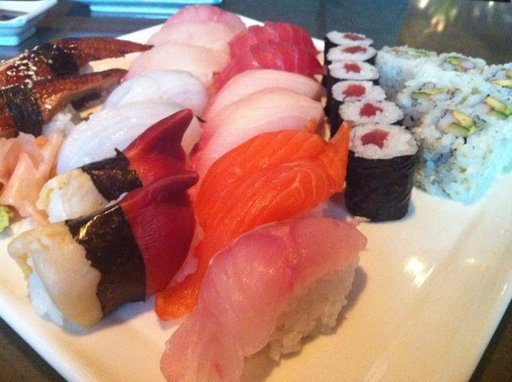

In [ ]:
# Visualizing using PIL

import random
from PIL import Image

random.seed(42)

image_path_list = list(img_path.glob('*/*/*.jpg'))

random_img_path = random.choice(image_path_list)
print(random_img_path)

image_class = random_img_path.parent.stem
print(image_class)

img = Image.open(random_img_path)
print(f"Random Image Path: {random_img_path}")
print(f"Image Class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

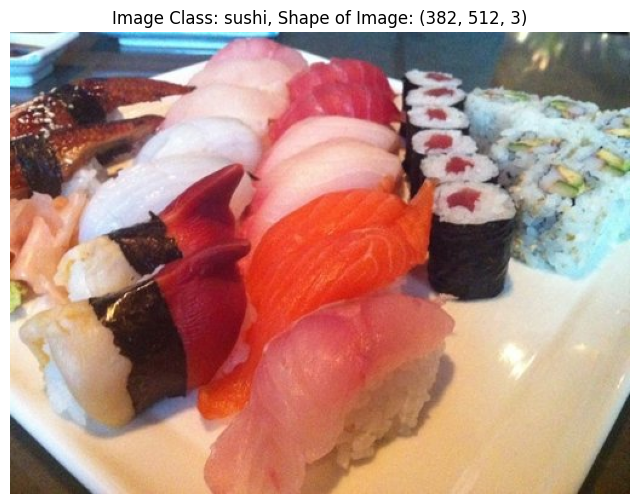

In [ ]:
# visualizing using matplotlib

img_as_array = np.array(img)

plt.figure(figsize=(10,6))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class}, Shape of Image: {img_as_array.shape}")
plt.axis(False)
plt.show()

### Transforming data into tensors

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
tensor_img = data_transform(img)

### Plotting the transformed and original images

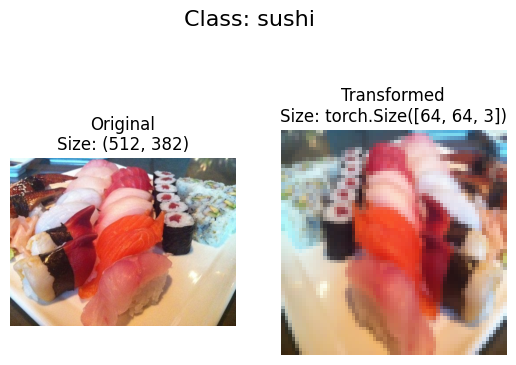

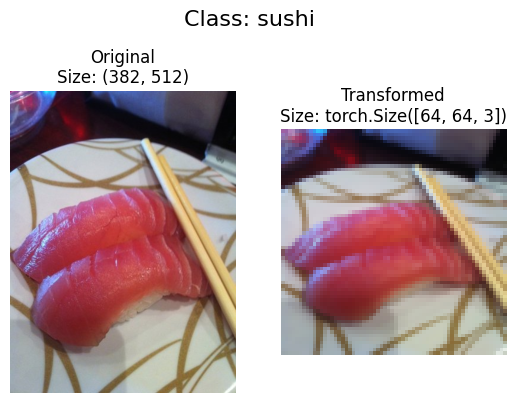

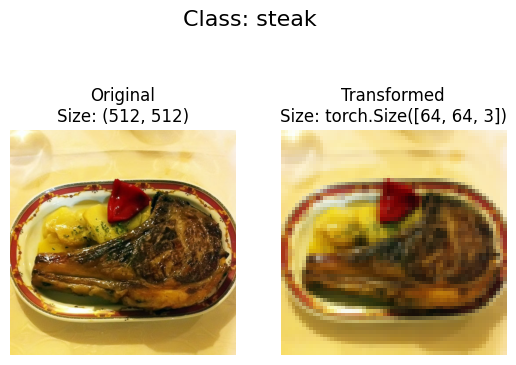

In [ ]:
def plot_transformed_image(image_paths: list, transform,
                           n=3, seed=None):
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths, k=n)
  for path in random_image_paths:
    with Image.open(path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_img = transform(f).permute(dims=(1,2,0))
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed\nSize: {transformed_img.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {path.parent.stem}", fontsize = 16)

plot_transformed_image(image_paths=image_path_list, transform = data_transform,
                       n=3, seed = 42)

### Option:1 Loading image data using `ImageFolder`

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,
                                 target_transform = None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Image Label: {label}")
print(f"Label dtype: {type(label)}")


Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Originial shape: torch.Size([3, 64, 64]) -> [Color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, Color_channels]


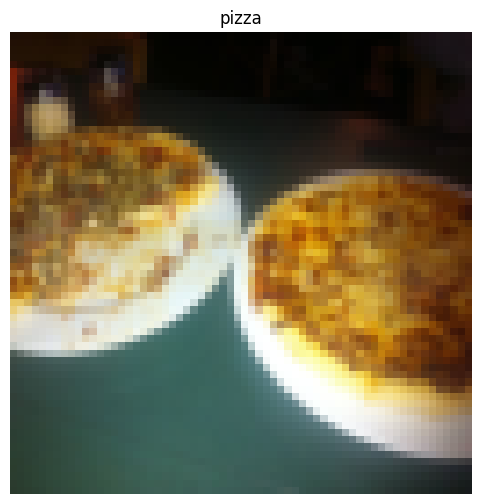

In [ ]:
# Rearrange the order of dimensions

img_permute = img.permute(1,2,0)

print(f"Originial shape: {img.shape} -> [Color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, Color_channels]")

plt.figure(figsize= (10,6))
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False)
plt.show()

### Turn out datasets into dataloaders

In [ ]:
from torch.utils.data import DataLoader
import os

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle = True,
                              num_workers = os.cpu_count())

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False,
                             num_workers = os.cpu_count())

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Image label: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Image label: torch.Size([32])


### Option:2 Loading Image data using custom dataset

In [ ]:
import os
import torch
from torch.utils.data import Dataset
import pathlib
from PIL import Image
from typing import Dict, List, Tuple
from torchvision import transforms

In [ ]:
# Instance of torchvision.datsets.ImageFolder

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a helper function to get class names

In [ ]:
# setup path for target directory

target_dir = train_dir

print(f"Target dir: {target_dir}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_dir))

[<DirEntry 'sushi'>, <DirEntry 'steak'>, <DirEntry 'pizza'>]

In [ ]:
def find_classes(dir: str)-> Tuple[List[str], Dict[str, int]]:
  classes = sorted([entry.name for entry in list(os.scandir(dir)) if entry.is_dir()])

  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {dir}...")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

# def find_classes(dir: str)->Tuple[List[str], Dict[str, int]]:
#   classes = sorted([entry.name for entry in list(os.scandir(dir)) if entry.is_dir()])

#   if classes:
#     class_to_idx = {class_name:i for i, class_name in enumerate(classes)}
#     return classes, class_to_idx
#   raise FileNotFoundError(f"Coudln't find any classes in {dir}...")


In [ ]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a custom dataset to replicate `ImageFolder`

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)


# class imageFolderCustom(Dataset):
#   def __init__(self, targ_dir: str, transform)-> None:
#     self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
#     self.transform = transform
#     self.classes, self.class_to_idx = find_classes(targ_dir)

#   def load_img(self, index: int)-> Image.Image:
#     img_path = self.paths[index]
#     return Image.open(img_path)

#   def __len__(self)-> int:
#     return len(self.paths)

#   def __getitem__(self, index: int)-> Tuple[torch.Tensor, int]:
#     img = self.load_img(index)
#     class_name = self.paths[index].parent.name
#     class_idx = self.class_to_idx[class_name]

#     if self.transform:
#       return self.transform(img), class_idx
#     else:
#       return img, class_idx


In [ ]:
# create a transform

train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])



### Test out ImageFolderCustom

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir = target_dir,
                                      transform = train_transform)

test_data_custom = ImageFolderCustom(targ_dir = target_dir,
                                      transform = test_transform)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
# check for equality between original and custom ImageFolder

print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### Create a function to display random images

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n>10:
    n=10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, seting it to 10")

  if seed:
    random.seed(seed)

  random_sample_idx = random.sample(range(len(dataset)), k=n)
  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_sample_idx):

    targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_img_adjust = targ_img.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    plt.axis(False)
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_img_adjust.shape}"
    plt.title(title)


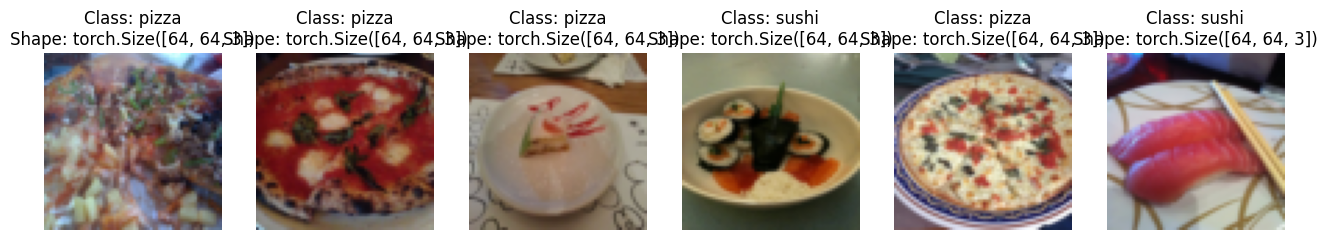

In [ ]:
display_random_images(train_data,
                      n=6,
                      classes = class_names,
                      seed = None)

For display purposes, n shouldn't be larger than 10, seting it to 10


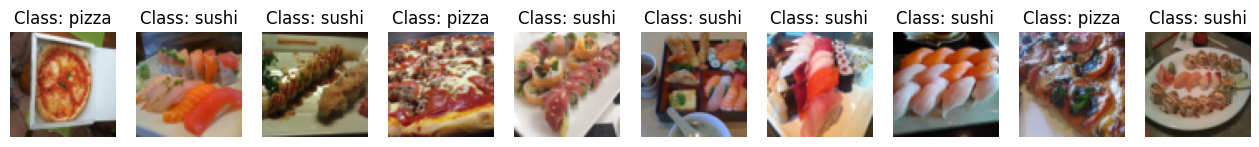

In [ ]:
display_random_images(train_data_custom,
                      n=20,
                      classes = class_names,
                      seed = 42)

### Turn our datasets into dataloaders

In [ ]:
train_dataloader = DataLoader(dataset = train_data_custom,
                              batch_size=32,
                              shuffle = True,
                              num_workers = os.cpu_count())

test_dataloader = DataLoader(dataset = test_data_custom,
                              batch_size=32,
                              num_workers = os.cpu_count())

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b19d4cf3b20>,
 <torch.utils.data.dataloader.DataLoader at 0x7b19d4cf3a60>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### Data Augmentation

### Forms

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])


In [ ]:
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/sushi/1551817.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2021381.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/686426.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1552504.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/497686.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/843815.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/840444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2873571.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/169392.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3360207.jpg')]

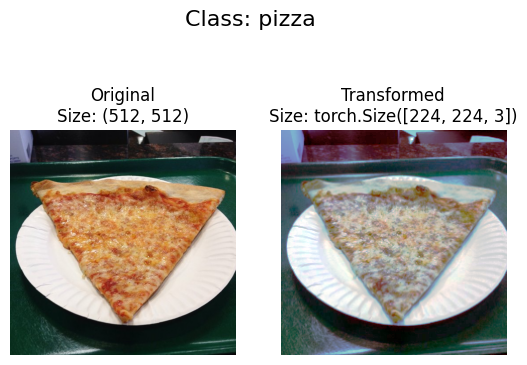

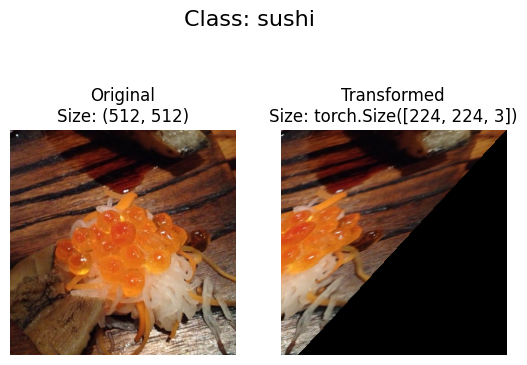

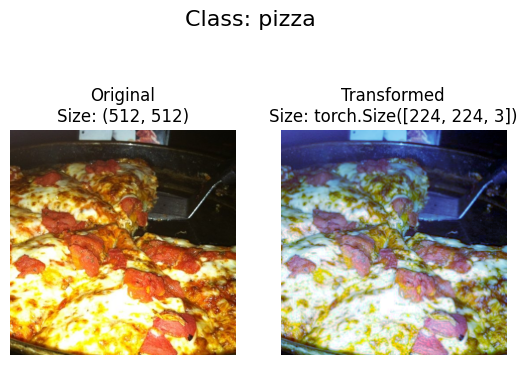

In [ ]:
plot_transformed_image(image_path_list,
                       train_transforms,
                       n=3,
                       seed = None)

### model0 -> Building a tinyVGG model without data augmentation

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                         transform = simple_transform)


simple_train_dataloader = DataLoader(dataset = train_data_simple,
                                     batch_size = 32,
                                     shuffle = True,
                                     num_workers = os.cpu_count())


simple_test_dataloader = DataLoader(dataset = test_data_simple,
                                     batch_size = 32,
                                     num_workers = os.cpu_count())

In [ ]:
# Creating tinyVGG Model

class tinyVGGModel(nn.Module):
  def __init__(self, input_features: int,
               hidden_units: int,
               output_features: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_features,
                  out_channels = hidden_units, kernel_size =3,
                  stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units, kernel_size =3,
                  stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units, kernel_size =3,
                  stride = 1, padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units, kernel_size =3,
                  stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*169, out_features = output_features)
    )

  def forward(self, x:torch.Tensor)-> torch.Tensor:
    x = self.block1(x)
    x = self.block2(x)
    x = self.linear_layer(x)

    return x
    # return self.linear_layer(self.block1(self.block2(x))) same as above forward method

In [ ]:
torch.manual_seed(42)

model0 = tinyVGGModel(input_features= 3,
                      hidden_units = 10,
                      output_features = len(class_names)).to(device)

model0

tinyVGGModel(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# create some dummy data and pass through the model

img_batch, label_batch = next(iter(simple_train_dataloader))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model0(img_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### Torchinfo --  getting information about the model

In [ ]:
! pip install -q torchinfo

In [ ]:
import torchinfo
from torchinfo import summary

summary(model0, input_size=[32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGGModel                             [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

### Training and testing functions

In [ ]:
loss_func = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params = model0.parameters(),
                        lr = 0.001)


def accuracy_score(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))
  return acc

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=None):

  trainAcc, trainLoss = 0,0
  for batch, (img, label) in enumerate(dataloader):
    img, label = img.to(device), label.to(device)
    model.train()
    trainPreds = model(img)
    loss = loss_fn(trainPreds, label)
    trainLoss += loss.item()
    trainAcc += accuracy_fn(label, trainPreds.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 5 == 0:
      print(f"Looked at {batch * len(img)}/{len(dataloader.dataset)} samples.")
  trainAcc /= len(dataloader)
  trainLoss /= len(dataloader)
  print(f"\nTrain-Loss: {trainLoss:4f} | Train-Accuracy: {trainAcc:2f}%")

  return trainLoss, trainAcc


In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=None):

  testAcc, testLoss = 0,0
  model.eval()
  with torch.inference_mode():
    for batch, (x_test, y_test) in enumerate(dataloader):
      x_test, y_test = x_test.to(device), y_test.to(device)
      testPreds = model(x_test)
      loss = loss_fn(testPreds, y_test)
      testLoss += loss.item()
      testAcc += accuracy_fn(y_test, testPreds.argmax(dim=1))
    testLoss /= len(dataloader)
    testAcc /= len(dataloader)
    print(f"Test-Loss: {testLoss:4f} | Test-Accuracy: {testAcc:.2f}%")

  return testLoss, testAcc


In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          epochs: int,
          device: torch.device=None):

  results = {'model_name': model.__class__.__name__,
             'train_loss': [],
             'test_loss': [],
             'train_acc': [],
             'test_acc': []}

  for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       accuracy_fn  = accuracy_fn,
                                       device = device)
    test_loss, test_acc = test_step(model = model,
                                       dataloader = test_dataloader,
                                       loss_fn = loss_fn,
                                       accuracy_fn  = accuracy_fn,
                                       device = device)

    results['train_loss'].append(train_loss)
    results['test_loss'].append(test_loss)
    results['train_acc'].append(train_acc)
    results['test_acc'].append(test_acc)

  return results



In [ ]:
from timeit import default_timer as timer

start_timer = timer()
model0_results = train(model0,
                       simple_train_dataloader,
                       simple_test_dataloader,
                       loss_func,
                       optim,
                       accuracy_score,
                       epochs = 20,
                       device=device)
end_timer = timer()
total_time = end_timer = start_timer
print(f"Total Training Time: {total_time:3f} seconds.")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.104243 | Train-Accuracy: 0.304688%
Test-Loss: 1.121133 | Test-Accuracy: 0.26%
Epoch: 1
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.111727 | Train-Accuracy: 0.285156%
Test-Loss: 1.126237 | Test-Accuracy: 0.20%
Epoch: 2
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.103991 | Train-Accuracy: 0.292969%
Test-Loss: 1.093585 | Test-Accuracy: 0.21%
Epoch: 3
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.078368 | Train-Accuracy: 0.503906%
Test-Loss: 1.094390 | Test-Accuracy: 0.24%
Epoch: 4
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.082491 | Train-Accuracy: 0.363281%
Test-Loss: 1.088243 | Test-Accuracy: 0.33%
Epoch: 5
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.045968 | Train-Accuracy: 0.621094%
Test-Loss: 1.055570 | Test-Accuracy: 0.37%
Epoch: 6
-------
Looked at 0

In [ ]:
model0_results

{'model_name': 'tinyVGGModel',
 'train_loss': [1.1042432337999344,
  1.1117268949747086,
  1.1039910912513733,
  1.0783683955669403,
  1.0824906378984451,
  1.0459683537483215,
  0.966061644256115,
  0.8341016583144665,
  0.8547921553254128,
  0.7887539938092232,
  0.7753117755055428,
  0.8903478309512138,
  0.8067717915400863,
  0.7958120927214622,
  0.8636019676923752,
  0.7616567090153694,
  0.7394455708563328,
  0.7940837666392326,
  0.7425481453537941,
  0.6774942630436271],
 'test_loss': [1.1211329698562622,
  1.126237154006958,
  1.0935847361882527,
  1.0943897565205891,
  1.0882434844970703,
  1.055570403734843,
  1.0333521366119385,
  1.1300957004229228,
  1.1059331893920898,
  1.0445577502250671,
  0.9970387816429138,
  1.0502872665723164,
  1.0691683491071065,
  1.0409571528434753,
  1.0064594546953838,
  1.0573281447092693,
  1.0528176228205364,
  1.0668923656145732,
  1.0576776266098022,
  1.0751431385676067],
 'train_acc': [0.3046875,
  0.28515625,
  0.29296875,
  0.50390

In [ ]:
model0_results.keys()

dict_keys(['model_name', 'train_loss', 'test_loss', 'train_acc', 'test_acc'])

### Plot the loss curves of model0

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  train_loss = results['train_loss']
  test_loss = results['test_loss']

  train_acc = results['train_acc']
  test_acc = results['test_acc']

  epochs = range(len(results['train_loss']))
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.plot(epochs, train_loss, label = 'train_loss')
  plt.plot(epochs, test_loss, label = 'test_loss')
  plt.xlabel('Epochs')
  plt.title('Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, train_acc, label = 'train_acc')
  plt.plot(epochs, test_acc, label = 'test_acc')
  plt.xlabel('Epochs')
  plt.title('Accuracy')
  plt.legend()


  plt.show()


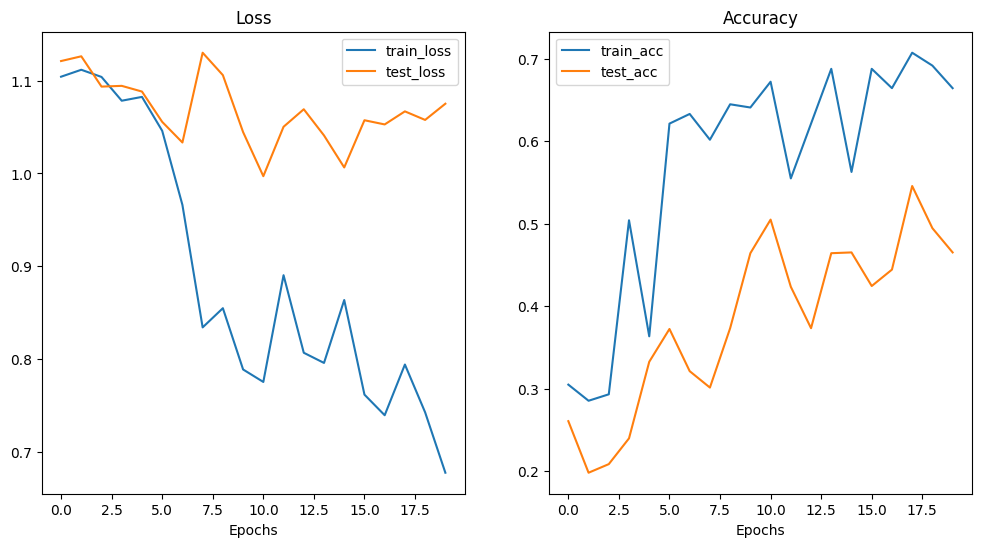

In [ ]:
plot_loss_curves(model0_results)

### TinyVGG model using data augmentation

In [ ]:
# Creating augmented data for training part and simple data for testing

train_trivial_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=3),
    transforms.ToTensor()
 ])
test_simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
 ])


# Turning data into tensors and Creating datasets

train_data_augmented = datasets.ImageFolder(root = train_dir,
                                             transform = train_trivial_transform,
                                             )

test_data_simple = datasets.ImageFolder(root = test_dir,
                                             transform = test_simple_transform,
                                             )



### Creating Train(Augmented) and Test(Simple) DataLoaders

In [ ]:
train_trivial_dataloader = DataLoader(dataset = train_data_augmented,
                                      batch_size = 32,
                                      shuffle = True,
                                      num_workers = os.cpu_count())

test_simple_dataloader = DataLoader(dataset = test_data_simple,
                                      batch_size = 32,
                                      num_workers = os.cpu_count())

In [ ]:
model1 = tinyVGGModel(input_features = 3, hidden_units = 10,
                      output_features = len(train_data_augmented.classes)).to(device)
model1

tinyVGGModel(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
start_timer = timer()

model1_results = train(model = model1,
                       train_dataloader = train_trivial_dataloader,
                       test_dataloader= test_simple_dataloader,
                       loss_fn = loss_func,
                       optimizer = optim,
                       accuracy_fn = accuracy_score,
                       epochs = 20,
                       device = device)
end_timer = timer()
print(f"Total time taken for model1 is: {end_timer-start_timer:.2f} seconds.")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.096475 | Train-Accuracy: 0.421875%
Test-Loss: 1.104690 | Test-Accuracy: 0.26%
Epoch: 1
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.100757 | Train-Accuracy: 0.300781%
Test-Loss: 1.104690 | Test-Accuracy: 0.26%
Epoch: 2
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.100469 | Train-Accuracy: 0.304688%
Test-Loss: 1.104690 | Test-Accuracy: 0.26%
Epoch: 3
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.095853 | Train-Accuracy: 0.425781%
Test-Loss: 1.104690 | Test-Accuracy: 0.26%
Epoch: 4
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.096220 | Train-Accuracy: 0.421875%
Test-Loss: 1.104690 | Test-Accuracy: 0.26%
Epoch: 5
-------
Looked at 0/225 samples.
Looked at 160/225 samples.

Train-Loss: 1.101503 | Train-Accuracy: 0.308594%
Test-Loss: 1.104690 | Test-Accuracy: 0.26%
Epoch: 6
-------
Looked at 0

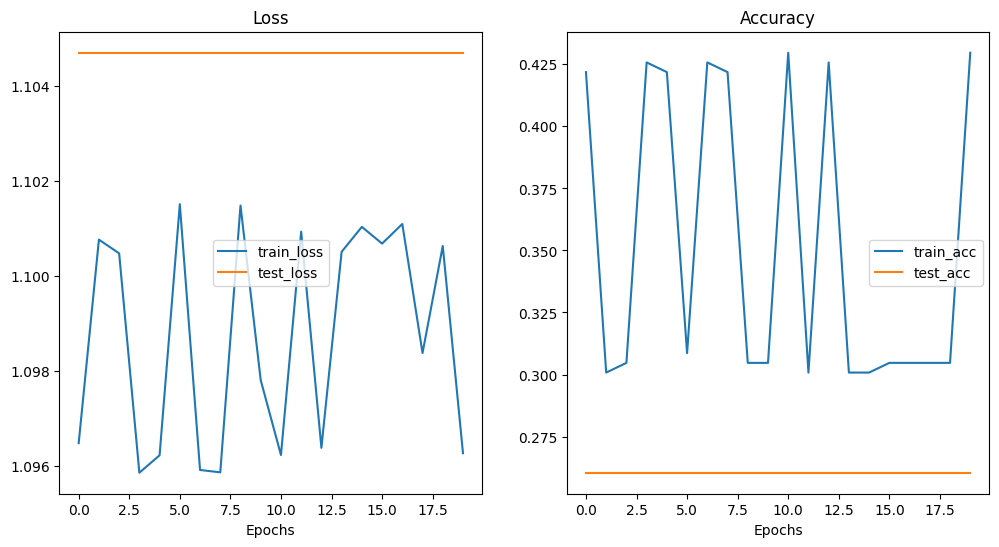

In [ ]:
plot_loss_curves(model1_results)

In [ ]:
import pandas as pd

model0_df = pd.DataFrame(model0_results)
model1_df = pd.DataFrame(model1_results)




In [ ]:
model0_df.head()

,model_name,train_loss,test_loss,train_acc,test_acc
0,tinyVGGModel,1.104243,1.121133,0.304688,0.260417
1,tinyVGGModel,1.111727,1.126237,0.285156,0.197917
2,tinyVGGModel,1.103991,1.093585,0.292969,0.208333
3,tinyVGGModel,1.078368,1.094390,0.503906,0.239583
4,tinyVGGModel,1.082491,1.088243,0.363281,0.332386


In [ ]:
model1_df.head()

,model_name,train_loss,test_loss,train_acc,test_acc
0,tinyVGGModel,1.096475,1.10469,0.421875,0.260417
1,tinyVGGModel,1.100757,1.10469,0.300781,0.260417
2,tinyVGGModel,1.100469,1.10469,0.304688,0.260417
3,tinyVGGModel,1.095853,1.10469,0.425781,0.260417
4,tinyVGGModel,1.096220,1.10469,0.421875,0.260417


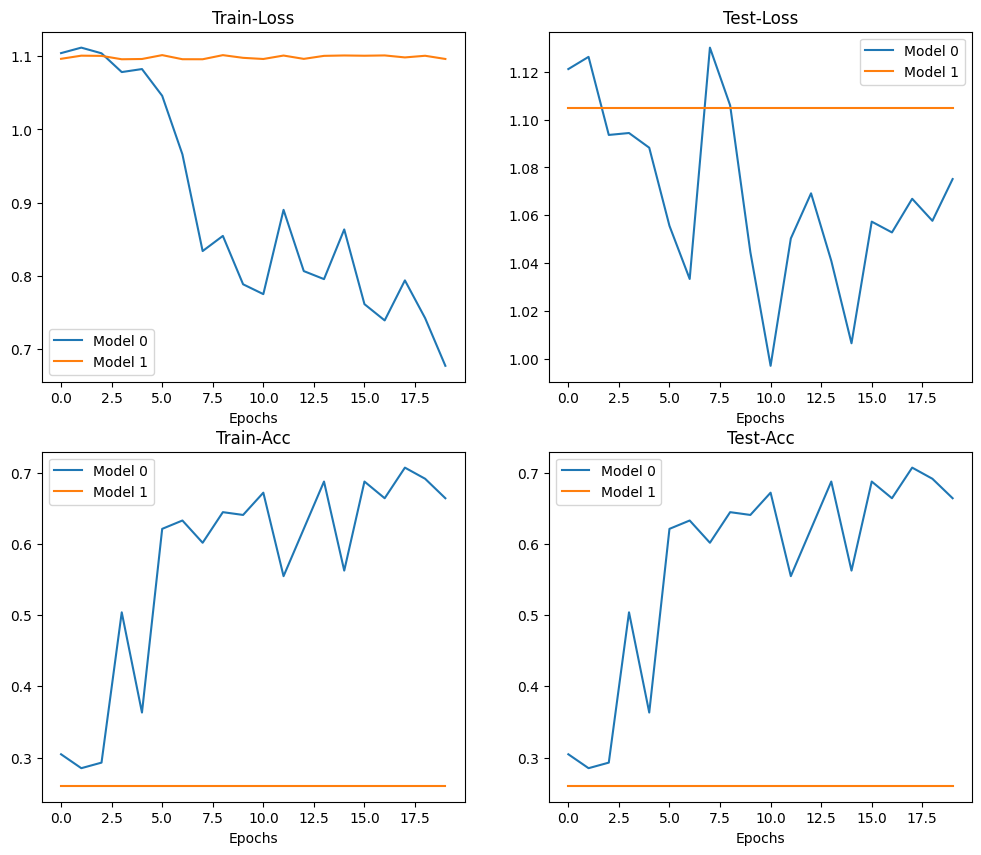

In [ ]:
plt.figure(figsize = (12,10))
epochs = range(len(model0_df))
plt.subplot(2,2,1)
plt.plot(epochs, model0_df['train_loss'], label = 'Model 0')
plt.plot(epochs, model1_df['train_loss'], label = 'Model 1')
plt.title('Train-Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model0_df['test_loss'], label = 'Model 0')
plt.plot(epochs, model1_df['test_loss'], label = 'Model 1')
plt.title('Test-Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model0_df['train_acc'], label = 'Model 0')
plt.plot(epochs, model1_df['test_acc'], label = 'Model 1')
plt.title('Train-Acc')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model0_df['train_acc'], label = 'Model 0')
plt.plot(epochs, model1_df['test_acc'], label = 'Model 1')
plt.title('Test-Acc')
plt.xlabel('Epochs')
plt.legend()

### Making a prediction on custom image

In [ ]:
import requests

custom_image = data_path/'01pizza.jpeg'

if not custom_image.is_file():
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/04-pizza-dad.jpeg')
  print(f"Downloading {custom_image}...")
  with open(custom_image, 'wb') as f:
    f.write(request.content)
else:
  print(f"{custom_image} Already exists, Skipping download...")

In [ ]:
str(custom_image)

'data/01pizza.jpeg'

In [ ]:
import torchvision

my_custom_image = torchvision.io.read_image(str(custom_image))
my_custom_image

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Shape of custom image: torch.Size([3, 4032, 3024])
Dtype of custom image: torch.uint8


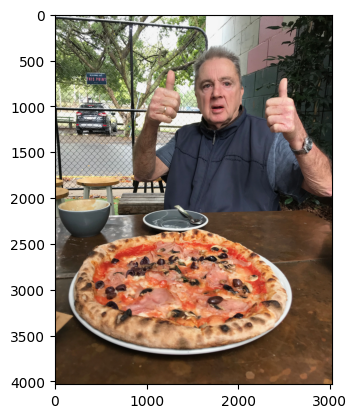

In [ ]:
plt.imshow(my_custom_image.permute(1,2,0))

print(f"Shape of custom image: {my_custom_image.shape}")
print(f"Dtype of custom image: {my_custom_image.dtype}")

In [ ]:
my_custom_image = torchvision.io.read_image(str(custom_image)).type(torch.float32)/255.

In [ ]:
# Create a transform pipeline to resize the image

custom_image_transfrom = transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed = custom_image_transfrom(my_custom_image)

print(f"Original image shape: {my_custom_image.shape}")
print(f"Transformed image shape: {custom_image_transformed.shape}")

Original image shape: torch.Size([3, 4032, 3024])
Transformed image shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


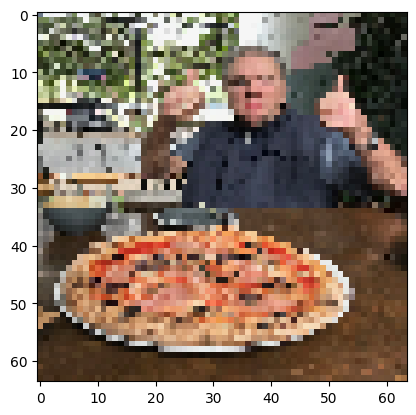

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
model0.eval()
with torch.inference_mode():
  custom_image_pred = model0(custom_image_transformed.unsqueeze(dim=0))
  custom_pred_probs = torch.softmax(custom_image_pred, dim=1).argmax(dim=1)

custom_image_pred, custom_pred_probs


(tensor([[ 0.1677, -0.3721, -0.6516]]), tensor([0]))

### Putting custom image prediction together: building a function

In [ ]:
def pred_adnd_plot(model: torch.nn.Module,
                   image_path: str,
                   class_names: List[str]= None,
                   transform = None,
                   device=device):
  target_img = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_img = target_img/255.0

  if transform:
    target_img = transform(target_img)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_img = target_img.unsqueeze(dim=0)
    preds = model(target_img.to(device))
  pred_probs = torch.softmax(preds, dim=1)
  pred_labels = pred_probs.argmax(dim=1)

  plt.imshow(target_img.squeeze(dim=0).permute(1,2,0))

  if class_names:
    title = f"pred: {class_names[pred_labels.cpu()]} | pred-probs: {pred_probs.max().cpu():.2f}"
  else:
    title = f"pred: {pred_labels.cpu()} | pred-probs: {pred_probs.max().cpu():.2f}"
  plt.title(title)
  plt.axis(False)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


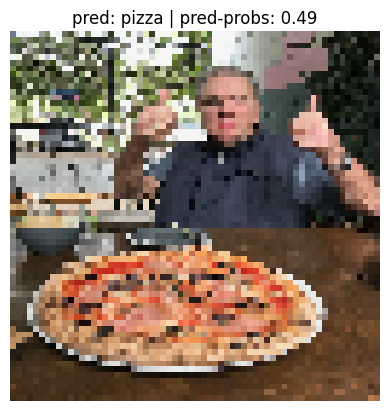

In [ ]:
pred_adnd_plot(model = model0,
               image_path = custom_image,
               class_names = class_names,
               transform = custom_image_transfrom,
               device = device)